## PROBLEM SET 1 - TAKE AT HOME (25 POINTS)

**You will lose all corresponding points if we can't access the implementation notebook URL or the Github URL. We will NOT message you. Do NOT invite the TAs to your Github repo (option 2 below) EARLIER than the morning of the day of the exam, since invites expire in 7 days.** 

## Introduction

In the last few years, the field of generative modeling has seen a lot of progress. The techniques that have been developed in this field are very useful for other tasks such as semi-supervised learning, representation learning, and reinforcement learning. In this problem statement we attempt to prepare you to understand the basics of a technique that has been very successful in generative modeling: Variational Autoencoders (VAEs). Understanding VAEs is  the key for you to get a head start with more advanced models such as [Stable Diffusion that are all the rage these days](https://clipdrop.co/stable-diffusion-turbo). 



## Task 1: Study what VAEs are and how they work (0 points)

Consult this [blog post](https://jaan.io/what-is-variational-autoencoder-vae-tutorial/) and its [2D VAE autoencoder implemenation for the MNIST dataset](https://github.com/jaanli/variational-autoencoder). 

## Task 2: Replicate the VAE for the MNIST dataset (25 points)

Implement the VAE model for the MNIST dataset and train it ensuring that you plot the loss curves for the training and validation sets and perform hyperparameter optimization on the size of the latent space as well as on the optimizer parameters. To all points you need to include as comments in the code or as markdown cells what each function in the code is doing. Don't be frugal in your commentary. (15 points)

Replicate the figure showing the final latent variable space shown below. Note that you will not produce the animated figure shown below but show only the final latent space $(z_1, z_2)$. (5 points)

Show VAE generated images for all digits 0-9 after model training. (5 points)

![](latent-variables.gif)

You have two implementation options: (1) All in one notebook (2) Github repo. 

### Option 1: All in one Colab notebook

You submit a single Colab notebook URL that contains all the code and the outputs. Your notebook should be self-contained and can be launched in Google Colab using a corresponding button at the top of the notebook. See the regression notebook in the course site for an example of such button. You **need to save all outputs in the notebook** so that the TAs can check that your code is working properly. 

### Option 2: Github repo 

If you prefer to work without notebooks, with containers or not, you can submit the implementation python scripts and version control your code in a private Github repo. You have to submit the Github URL and clearly document the way to launch the runtime / install requirements.txt and include all required figures in the README.md file. 

IMPORTANT: Ensure that the github repo remains private. If you submit a public github repo you will be held responsible for violating the honor code.

- # Solution

<div class="alert alert-block alert-info">
<b>Task 2</b>

    Below here there is explanation of the code and the code after that explanation
</div>


The code snippet provided below is to set up a deep learning task in Python using PyTorch. 
It involves importing necessary libraries for neural network creation, data loading, and visualization. 
The aim of this code is to prepare image data for processing and visualizing which might be required for tasks like image classification or 
feature extraction.

In [2]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

This code defines a **Variational Autoencoder (VAE)**, which is a kind of neural network used for generative tasks in deep learning. The `VAE` class extends PyTorch's `nn.Module` and consists of two main parts: an encoder and a decoder. The encoder compresses the input into a latent space (using linear transformations and ReLU activation), while the decoder reconstructs the input from the latent space (using a sigmoid activation).  VAEs are known for being able to add randomness through their use of ‘reparameterize’ function during training. For its regularization technique, the ‘loss_function’ has been engineered to combine binary cross-entropy (BCE) as reconstruction loss together with kullback-Leibler divergence (KLD) ensuring that the latent space distribution stays close to standard normal distribution.

In [3]:

# Define the Variational Autoencoder (VAE) class
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        # Encoder
        self.fc1 = nn.Linear(input_dim, 400)
        self.fc21 = nn.Linear(400, latent_dim)  # Mean
        self.fc22 = nn.Linear(400, latent_dim)  # Log variance

        # Decoder
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc4 = nn.Linear(400, input_dim)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def encode(self, x):
        h1 = self.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = self.relu(self.fc3(z))
        return self.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Loss function for VAE
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD


Here, the MNIST dataset is loaded for machine learning purposes. It then proceeds to define the batch size for processing, changes the images into tensors using transformations then creates DataLoader instances for both training and testing sets. These are the classes that handle dataset preparation before feeding them to a model, such as shuffling and batching of data which will be done in our Variational Autoencoder.

In [4]:


# Load MNIST dataset
batch_size = 64
transform = transforms.ToTensor()
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

This part describes the model’s hyperparameters for the Variational Autoencoder (VAE) `input_dim` is set to 784 because that is the number of pixels in each image from MNIST after flattening a 28x28 image. `latent_dim` is set to 20 since that will be the size of the representation space generated by the VAE where it compresses its input data. Lastly, `learning_rate` is set to 0.001 (1e-3) as this will determine how long we move while iterating towards a minimum loss function during training. These are important parameters for building and training this model.

In [5]:

# Hyperparameters
input_dim = 784  # 28x28 images
latent_dim = 20  # Size of the latent space
learning_rate = 1e-3



In this piece of code,  we initialize our Variational Autoencoder (VAE) model and set-up an optimizer for training;

1. **Model Initialization**:

   - `model = VAE(input_dim, latent_dim)`: This line of code instantiates the VAE class created before with `input_dim` as 784 and `latent_dim` equal to 20. It initializes the VAE with encoder and decoder architecture defined above.

2. **Optimizer Setup**:

   - `optimizer = optim.Adam(model.parameters(), lr=learning_rate)`: Initializes an Adam optimizer which is a widely used one for deep learning models. Here, the optimizer is configured to adjust parameters within the VAE model (`model.parameters()`) at a learning rate (`lr`) of 0.001 (`learning_rate`). An Adam optimizer has features like adaptable learning rate properties and high efficiency hence suitable when training a VAE

In [6]:

# Model, optimizer and training
model = VAE(input_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

This code snippet creates a training loop for Variational Autoencoder (VAE) model on MNIST dataset:

**1. Training Function (`train`):**

   - The `train` function should take epoch number and log interval as arguments. It sets the model in train mode, initializes an accumulator variable for loss and iterates over train data (`train_loader`). 

   - For each batch, data will be moved onto specified `device` (GPU or CPU), optimizer’s gradients are zeroed out, and then model computes reconstruction, mean and log variance.

   - Loss is calculated through application of `loss_function`, which is then backpropagated using `loss.backward()`. Optimizer steps update model parameters via calling `optimizer.step()`.
   - **Settings for Training:**

The number of training epochs is set to 10, while the choice of device depends on whether or not a GPU is available.

We move the model to the chosen device (model.to(device)-**).

Training** Loop:

For a specified number of epochs, we have a loop running in which each time the train function is called and average loss per epoch is stored in train_l**osses.

Plotting Trai**ning Loss:

These losses are plotted after training using matplotlib that provides a visual representation of how training happens and how loss decreases with time (epochs).

This training loop is vital as it teaches VAE how to effectively encode and decode MNIST images thus learning how to generate new data similar to given input.

Train Epoch: 1 [0/60000 (0%)]	Loss: 546.376404
Train Epoch: 1 [640/60000 (1%)]	Loss: 287.624023
Train Epoch: 1 [1280/60000 (2%)]	Loss: 243.551849
Train Epoch: 1 [1920/60000 (3%)]	Loss: 219.257401
Train Epoch: 1 [2560/60000 (4%)]	Loss: 219.788696
Train Epoch: 1 [3200/60000 (5%)]	Loss: 213.594315
Train Epoch: 1 [3840/60000 (6%)]	Loss: 207.563004
Train Epoch: 1 [4480/60000 (7%)]	Loss: 201.494827
Train Epoch: 1 [5120/60000 (9%)]	Loss: 191.442139
Train Epoch: 1 [5760/60000 (10%)]	Loss: 191.768387
Train Epoch: 1 [6400/60000 (11%)]	Loss: 191.816971
Train Epoch: 1 [7040/60000 (12%)]	Loss: 182.040375
Train Epoch: 1 [7680/60000 (13%)]	Loss: 175.225128
Train Epoch: 1 [8320/60000 (14%)]	Loss: 172.953644
Train Epoch: 1 [8960/60000 (15%)]	Loss: 175.830750
Train Epoch: 1 [9600/60000 (16%)]	Loss: 166.401657
Train Epoch: 1 [10240/60000 (17%)]	Loss: 164.019424
Train Epoch: 1 [10880/60000 (18%)]	Loss: 166.437057
Train Epoch: 1 [11520/60000 (19%)]	Loss: 160.404404
Train Epoch: 1 [12160/60000 (20%)]	Loss: 

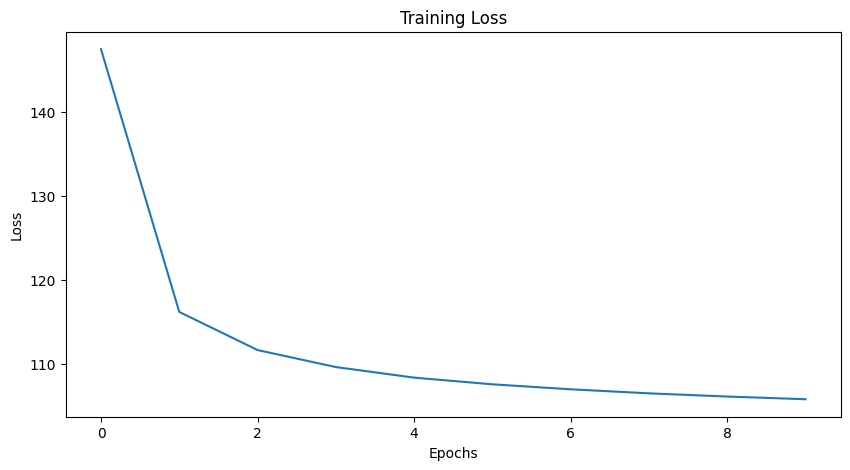

In [7]:
# Training loop
def train(epoch, log_interval=10):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item() / len(data):.6f}")

    avg_loss = train_loss / len(train_loader.dataset)
    print(f'====> Epoch: {epoch} Average loss: {avg_loss:.4f}')
    return avg_loss

# Training settings
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_losses = []

for epoch in range(1, epochs + 1):
    loss = train(epoch)
    train_losses.append(loss)

# Plotting training loss
plt.figure(figsize=(10,5))
plt.title("Training Loss")
plt.plot(train_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


This code first defines a function for visualizing latent space of the Variational Autoencoder (VAE), then uses it to plot latent space representations of MNIST test dataset:

**Function plot_latent_space:**

It takes arguments being trained VAE model plus data loader (data_loader).

A mode model.eval() has been set to allow inference disabling dropout as well as batch normalization layers since this is essential during inference.

Finally, within this function we iterate through all provided data loading batches at once encoding them into latent space mean mu vectors by applying method model.encode.
- These latent space vectors (`X`) and their corresponding labels (`Y`) are accumulated.
 
 - It then uses t-SNE (t-Distributed Stochastic Neighbor Embedding), which is a dimensionality reduction technique, to project the high-dimensional latent space onto a 2D plane for visualization
 
 - This is followed by the creation of a scatter plot with the t-SNE components, colored by the labels, providing an insight into how the digits are clustered in the latent space.

2. **Plotting the Latent Space**:

   - Then, the function `plot_latent_space` is called with the trained model and the test dataset loader (`test_loader`).
   
    - The clusters in this 2D plot reflect how good VAE has learned about separating various classes (digits) within its latent space.
    
Such visualizations play an essential role in evaluating models like VAEs as they provide important insights on how different classes of data are organized and represented within the latent space.

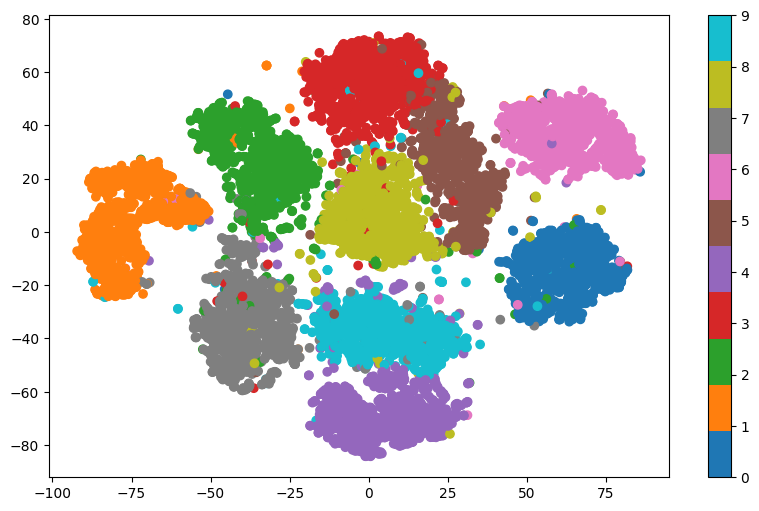

In [9]:




# Function to plot latent space
def plot_latent_space(model, data_loader):
    model.eval()
    X, Y = [], []
    with torch.no_grad():
        for data, labels in data_loader:
            data = data.to(device)
            mu, _ = model.encode(data.view(-1, 784))
            X.extend(mu.cpu().numpy())
            Y.extend(labels.cpu().numpy())

    X_embedded = TSNE(n_components=2).fit_transform(np.array(X))
    plt.figure(figsize=(10, 6))
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=Y, cmap='tab10')
    plt.colorbar()
    plt.show()

# Plotting the final latent variable space
plot_latent_space(model, test_loader)




This code defines a function to generate new digit images using the trained Variational Autoencoder (VAE) and then displays these generated images:

1. **Function `generate_digit_images`**:

   - In `model.eval()` mode, which is crucial for generating images, the function ensures that the model's dropout and batch normalization layers are in inference mode.

   - Random points in the latent space (`z`) are generated by `torch.randn`, a method that creates a tensor of size (`num_images`, `latent_dim`) with values drawn from a standard normal distribution.

   - After this, the decoder part of VAE (`model.decode`) converts these random latent points into new images.

   - The generated shapes are returned to their original forms (28x28 pixels for MNIST images).

2. **Generating and Displaying Images**:

   - To produce 10 new digit images, use the function generate_digit_images.

   - These pictures are shown using matplotlib. They are arranged in a grid of 1x10, displayed as grayscale images (`cmap='gray'`). Cleaner visualization is achieved by turning off axes.

By sampling points from the latent space, this process demonstrates the generative nature of VAE.

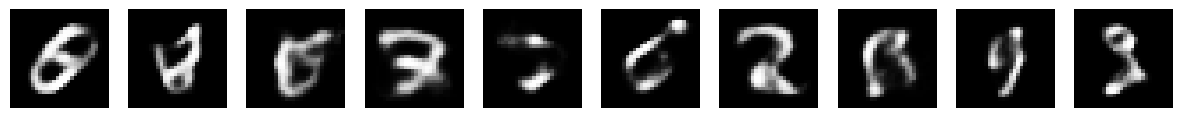

In [10]:
def generate_digit_images(model, latent_dim, num_images=10):
    model.eval()
    with torch.no_grad():
        # Sample random points in the latent space
        z = torch.randn(num_images, latent_dim).to(device)
        # Generate images
        generated_images = model.decode(z).cpu()
        return generated_images.view(-1, 28, 28)

# Generate images
generated_images = generate_digit_images(model, latent_dim, num_images=10)
# Display generated images
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(generated_images[i].numpy(), cmap='gray')
    plt.axis('off')
plt.show()

